## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
"""
Compile 模型
"""
model = build_mlp()
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=20, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 58s 1ms/step - loss: 1.7281 - acc: 0.3985 - val_loss: 1.7291 - val_acc: 0.4016
Epoch 2/20
50000/50000 [==============================] - 12s 248us/step - loss: 1.7237 - acc: 0.3983 - val_loss: 1.7255 - val_acc: 0.3967
Epoch 3/20
50000/50000 [==============================] - 12s 239us/step - loss: 1.7196 - acc: 0.3996 - val_loss: 1.7196 - val_acc: 0.3994
Epoch 4/20
50000/50000 [==============================] - 12s 234us/step - loss: 1.7157 - acc: 0.4025 - val_loss: 1.7164 - val_acc: 0.4027
Epoch 5/20
50000/50000 [==============================] - 11s 223us/step - loss: 1.7116 - acc: 0.4045 - val_loss: 1.7140 - val_acc: 0.4041
Epoch 6/20
50000/50000 [==============================] - 12s 233us/step - loss: 1.7075 - acc: 0.4043 - val_loss: 1.7083 - val_acc: 0.4042
Epoch 7/20
50000/50000 [==============================] - 11s 212us/step - loss: 1.7037 - acc: 0.4057 - val_loss: 1.70

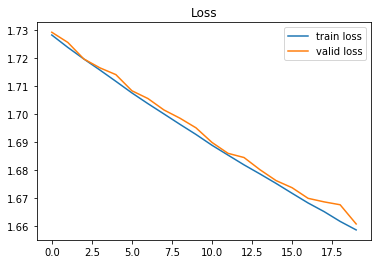

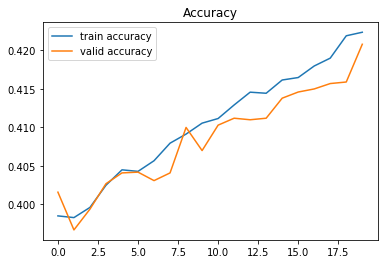

In [23]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()